In [117]:
import os
import angr
import monkeyhex
from tqdm.notebook import tqdm

import networkx as nx
import scipy as sp
import numpy as np

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,5

import pprint


import warnings
warnings.filterwarnings("ignore")

In [2]:
file = open("cfgs.p",'rb')
D = pickle.load(file)

In [8]:
iterorder = []
evecs = []
evals = []
for i, uname in enumerate(tqdm(D)):
    
    graph = D[uname]
    if not np.allclose(a, a.T, rtol=1e-5, atol=1e-5):
        print('{} not symmetric'.format(uname))
    eigs = sp.linalg.eigh(graph, subset_by_index=[0, 5])
    
    iterorder.append(uname)
    evals.append(eigs[0])
    evecs.append(eigs[1])

(array([ 0.,  0.,  0.,  0.,  0., 33.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

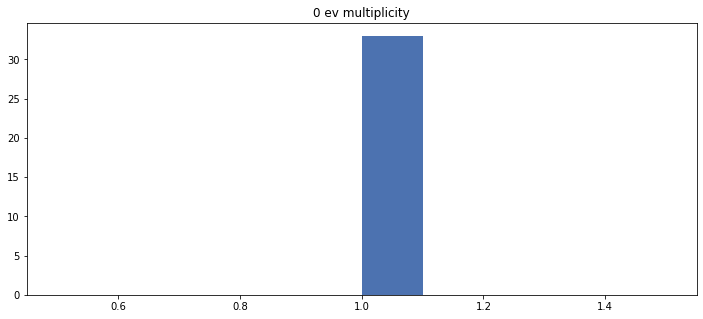

In [135]:
plt.title('0 ev multiplicity')
plt.hist([np.isclose(x,0.0).sum() for x in evals])

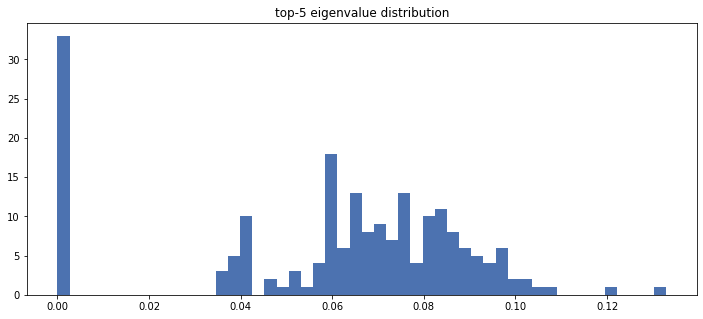

In [110]:
plt.title('top-5 eigenvalue distribution')
plt.hist(np.concatenate(evals), bins=50, label=iterorder)
plt.show()

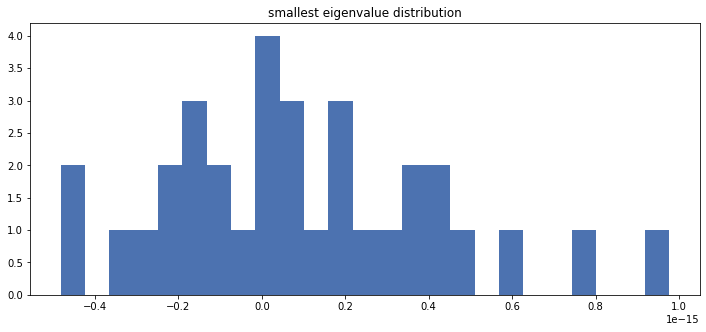

In [130]:
plt.title('smallest eigenvalue distribution')
plt.hist([np.min(x) for x in evals], bins=25, label=iterorder)
#plt.legend(loc='upper right')
plt.show()

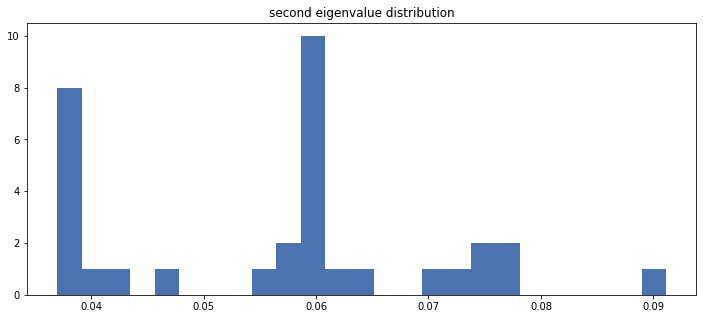

In [108]:
plt.title('second eigenvalue distribution')
plt.hist([x[1] for x in evals], bins=25, label=iterorder)
#plt.legend(loc='upper right')
plt.show()

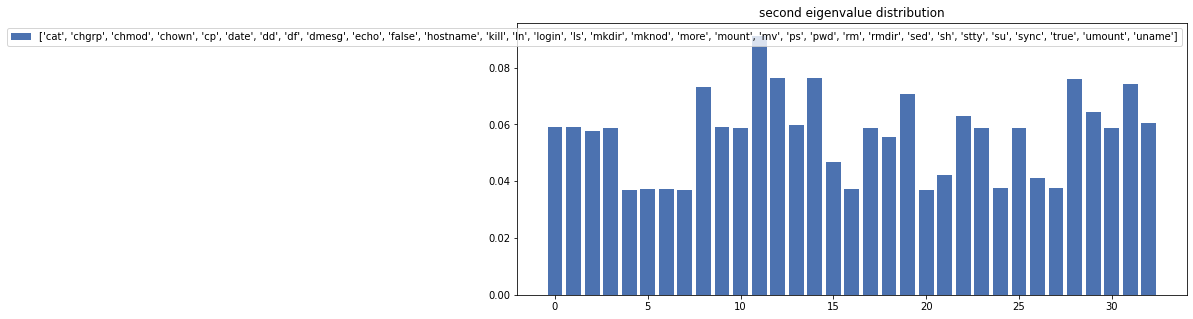

In [146]:
plt.title('second eigenvalue distribution')
plt.bar(list(range(len(evals))),[x[1] for x in evals],label=iterorder)
plt.legend(loc='upper right')
plt.show()

In [149]:
# sort by spec. gap
[iterorder[i] for i in np.argsort(np.array([x[1] for x in evals]))]

['cp',
 'df',
 'mv',
 'mkdir',
 'date',
 'dd',
 'stty',
 'rmdir',
 'sh',
 'ps',
 'ls',
 'more',
 'chmod',
 'sed',
 'mknod',
 'rm',
 'chown',
 'true',
 'false',
 'chgrp',
 'echo',
 'cat',
 'ln',
 'uname',
 'pwd',
 'sync',
 'mount',
 'dmesg',
 'umount',
 'su',
 'kill',
 'login',
 'hostname']

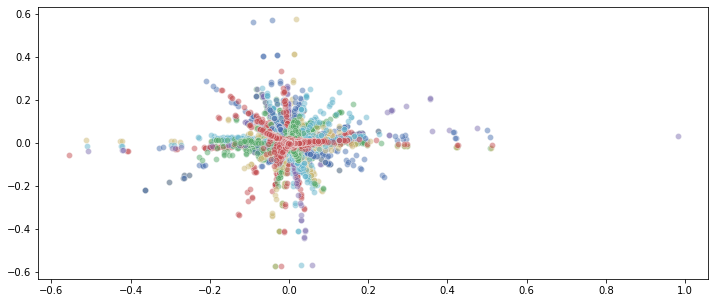

In [118]:
[sns.scatterplot(e[:,1], e[:,2], alpha = 0.5) for e in evecs]
plt.show()

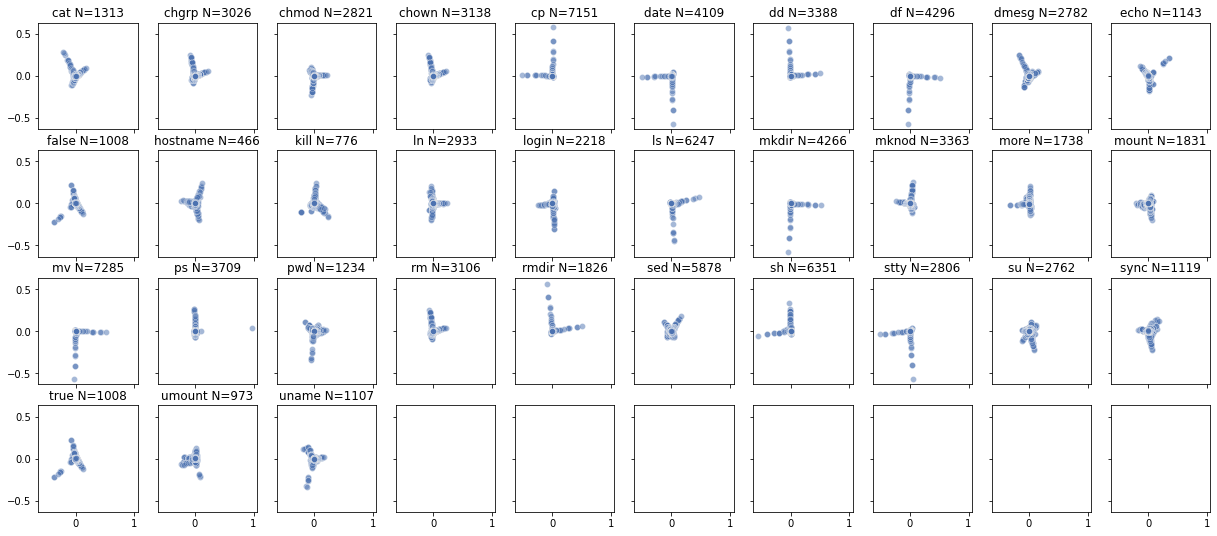

In [129]:
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(21,9), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i >= len(evecs):
        continue
    e = evecs[i]
    ax.set_title('{} N={}'.format(iterorder[i], e.shape[0]))
    sns.scatterplot(e[:,1], e[:,2], alpha = 0.5, ax=ax)